In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#load dataset
data = pd.read_csv('/content/drive/MyDrive/Data Science in Finance/python-material/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv/content/drive/MyDrive/Data Science in Finance/python-material/Final Project/data/Loan_status_2007-2020Q3-100ksample.csv

In [ ]:
#display sample of dataset
data.sample(100)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
56078,409137,55719,124435012,20000.0,20000.0,20000.0,36 months,6.08%,609.17,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
92085,1951203,83442,63408553,35000.0,35000.0,35000.0,36 months,7.89%,1095.00,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
37200,1890513,22752,66615501,11700.0,11700.0,11700.0,60 months,13.18%,267.30,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
10596,2104269,236508,51566234,21000.0,21000.0,20975.0,60 months,10.99%,456.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
47353,2082673,214912,55255867,10000.0,10000.0,10000.0,60 months,16.99%,248.48,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70308,2365103,76247,71964855,28650.0,28650.0,28650.0,36 months,18.99%,1050.06,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
81796,92034,49498,7082414,25000.0,25000.0,24950.0,36 months,7.90%,782.26,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
11445,736876,26174,140098564,5000.0,5000.0,5000.0,36 months,6.11%,152.36,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
24842,706203,126273,131060302,13000.0,13000.0,13000.0,36 months,14.07%,444.76,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
#check datatypes for all columns in dataset
data.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
id,int64
loan_amnt,float64
funded_amnt,float64
...,...
hardship_loan_status,object
orig_projected_additional_accrued_interest,float64
hardship_payoff_balance_amount,float64
hardship_last_payment_amount,float64


In [ ]:
#Check to see if any columns have datetime as a datatype
data.select_dtypes(include=['datetime']).columns
#Check to see if any columns *should* have datetime as a datatype
dates = data.columns[data.columns.str.contains('date')]
#Convert these into datetime format
data['hardship_start_date'] = pd.to_datetime(data['hardship_start_date']).dt.to_period('M')
data['hardship_end_date'] = pd.to_datetime(data['hardship_end_date']).dt.to_period('M')
data['payment_plan_start_date'] = pd.to_datetime(data['payment_plan_start_date']).dt.to_period('M')

<ipython-input-5-4128e5875a78>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hardship_start_date'] = pd.to_datetime(data['hardship_start_date']).dt.to_period('M')
<ipython-input-5-4128e5875a78>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hardship_end_date'] = pd.to_datetime(data['hardship_end_date']).dt.to_period('M')
<ipython-input-5-4128e5875a78>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['payment_plan_start_date'] = pd.to_datetime(data['payment_plan_start_date']).dt.to_period('M')


In [ ]:
#Check if any string columns could have numeric values extracted
strings = data.select_dtypes(include=['object']).columns
data[strings]

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_loan_status,debt_settlement_flag
0,36 months,13.08%,B,B5,cashier,10+ years,MORTGAGE,Source Verified,Mar-2020,Current,...,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
1,60 months,9.16%,B,B2,ABM,6 years,RENT,Source Verified,Feb-2016,Current,...,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
2,36 months,10.49%,B,B3,driver,10+ years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,...,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
3,60 months,11.05%,B,B4,NaN,NaN,MORTGAGE,Not Verified,Jun-2018,Current,...,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
4,60 months,13.59%,C,C2,Shipping Clerk,10+ years,MORTGAGE,Source Verified,Jan-2018,Fully Paid,...,Feb-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,36 months,11.49%,B,B5,Regional Sales Manager,1 year,MORTGAGE,Source Verified,Jul-2016,Fully Paid,...,Apr-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
99996,36 months,9.80%,B,B3,Sales Manager,2 years,RENT,Not Verified,Jan-2016,Fully Paid,...,Jan-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
99997,60 months,19.99%,D,D4,Certified Nurse's Assistant,10+ years,RENT,Not Verified,Jun-2016,Charged Off,...,Aug-2018,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N
99998,36 months,8.81%,A,A5,ACCOUNTANT,10+ years,MORTGAGE,Not Verified,Sep-2019,Current,...,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,N


In [ ]:
#Convert issue_d and last_credit_pull_d into datetime
data['issue_d'] = pd.to_datetime(data['issue_d']).dt.to_period('M')
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d']).dt.to_period('M')

<ipython-input-7-0d8112f5e635>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d']).dt.to_period('M')
<ipython-input-7-0d8112f5e635>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d']).dt.to_period('M')


In [ ]:
#Extract numeric data from string columns containing numbers
data['term_numeric'] = data['term'].str.extract('(\d+)').astype(int)
data['int_rate_numeric'] = data['int_rate'].str.extract('(\d+\.\d+)').astype(float)
data['emp_length_numeric'] = data['emp_length'].str.extract('(\d+)').astype(float)

In [ ]:
data[['term', 'term_numeric', 'int_rate', 'int_rate_numeric', 'emp_length', 'emp_length_numeric']].sample(10)

,term,term_numeric,int_rate,int_rate_numeric,emp_length,emp_length_numeric
18737,36 months,36,14.30%,14.30,3 years,3.0
72954,60 months,60,12.62%,12.62,10+ years,10.0
25597,60 months,60,15.05%,15.05,10+ years,10.0
6402,36 months,36,11.02%,11.02,10+ years,10.0
3377,36 months,36,17.99%,17.99,10+ years,10.0
90693,36 months,36,14.08%,14.08,2 years,2.0
95317,60 months,60,14.47%,14.47,3 years,3.0
50442,36 months,36,12.69%,12.69,5 years,5.0
78920,36 months,36,16.95%,16.95,NaN,NaN
11686,36 months,36,14.47%,14.47,3 years,3.0


In [ ]:
#Ensure all records are unique
data.duplicated().sum()

np.int64(0)

In [ ]:
#Check for any columns that can be encoded for machine learning
data[data.select_dtypes(include=['object']).columns].nunique()

,0
term,2
int_rate,584
grade,7
sub_grade,35
emp_title,40094
emp_length,11
home_ownership,6
verification_status,3
loan_status,10
pymnt_plan,1


In [ ]:
#OneHotEncode columns where the number of unique values is 2
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the selected columns
enc.fit(data[['hardship_flag', 'term','initial_list_status','application_type', 'debt_settlement_flag']])

# Transform the selected columns
encoded_data = enc.transform(data[['hardship_flag', 'term','initial_list_status','application_type', 'debt_settlement_flag']])

# Create a new DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['hardship_flag', 'term','initial_list_status','application_type', 'debt_settlement_flag']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

In [ ]:
#drop unspecified columns
data.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

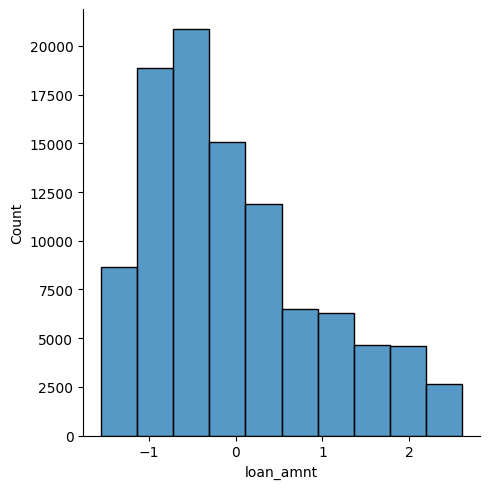

In [ ]:
from scipy import stats
z_scores = stats.zscore(data["loan_amnt"])
sns.displot(z_scores, bins = 10)

In [ ]:
import pandas as pd
from scipy import stats

def find_columns_with_most_outliers(data, threshold=3):
    """
    Finds columns with the most outliers in a pandas DataFrame.

    Args:
        data: pandas DataFrame
        threshold: The z-score threshold for identifying outliers.

    Returns:
        A pandas Series with column names as index and the number of outliers as values,
        sorted in descending order.
    """

    outlier_counts = {}
    for col in data.select_dtypes(include=['float64', 'float32']):  # Check only float columns
        z_scores = stats.zscore(data[col])
        outliers = data[col][(z_scores > threshold) | (z_scores < -threshold)]
        outlier_counts[col] = len(outliers)

    outlier_series = pd.Series(outlier_counts).sort_values(ascending=False)
    return outlier_series

# Run function and ignore values where n of outliers was 100,000 (encoded columns)
outlier_counts_series = find_columns_with_most_outliers(data)
outlier_df = pd.DataFrame(outlier_counts_series, columns = ['Count'])
outlier_df[outlier_df['Count'] != 100000]

,Count
application_type_Individual,7166
application_type_Joint App,7166
hardship_flag_N,5493
hardship_flag_Y,4166
last_pymnt_amnt,2707
...,...
hardship_last_payment_amount,0
initial_list_status_w,0
initial_list_status_f,0
term_ 60 months,0


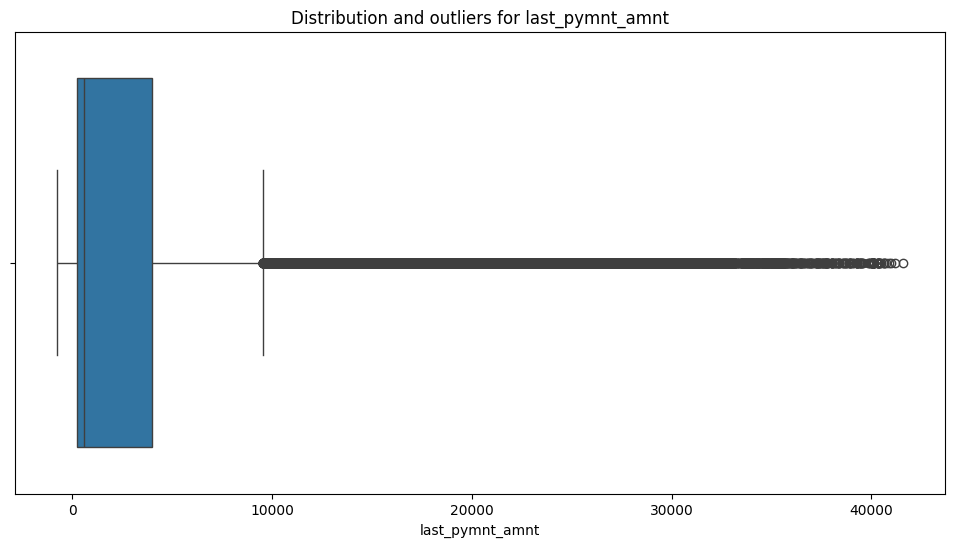

In [ ]:
# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['last_pymnt_amnt'])
plt.title(f"Distribution and outliers for {'last_pymnt_amnt'}")
plt.show()


In [ ]:
#Remove outliers
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
field_to_clean = "last_pymnt_amnt"
df_no_outliers = data[(z_scores[field_to_clean] < 3)]
df_no_outliers.shape

(97293, 155)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-18-3dddd39d24b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['last_pymnt_amnt_log'] = np.log1p(df_no_outliers['last_pymnt_amnt'])


2.629362649200478

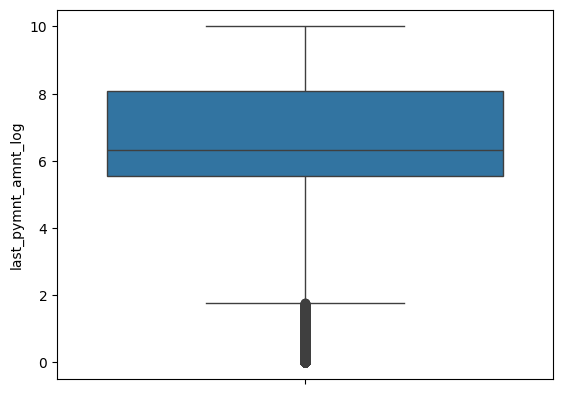

In [ ]:
df_no_outliers['last_pymnt_amnt_log'] = np.log1p(df_no_outliers['last_pymnt_amnt'])
sns.boxplot(df_no_outliers['last_pymnt_amnt_log'])
max(np.abs(stats.zscore(df_no_outliers['last_pymnt_amnt_log'].dropna())))

In [ ]:
df_no_outliers['emp_title'].value_counts()[:15]

,count
emp_title,
Teacher,1674
Manager,1493
Owner,793
Driver,677
Registered Nurse,667
RN,621
Supervisor,572
Sales,500
Office Manager,458


In [ ]:
df_no_outliers['emp_title_clean'] = df_no_outliers['emp_title'].str.lower().str.strip()
df_no_outliers['emp_title_clean'].value_counts()[:15]

<ipython-input-20-a5750ee92ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['emp_title_clean'] = df_no_outliers['emp_title'].str.lower().str.strip()


,count
emp_title_clean,
teacher,2076
manager,1995
owner,1217
driver,997
registered nurse,984
supervisor,954
sales,739
rn,725
office manager,658


In [ ]:
df_no_outliers['emp_title_manager'] = df_no_outliers['emp_title_clean'].str.contains("manager")
df_no_outliers['emp_title_manager'].value_counts()

<ipython-input-21-a56eec3cef44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['emp_title_manager'] = df_no_outliers['emp_title_clean'].str.contains("manager")


,count
emp_title_manager,
False,75023
True,13436


In [ ]:
selected_columns = df_no_outliers[["emp_title_manager", "emp_title_clean"]]
unique_combinations = selected_columns.drop_duplicates()
unique_combinations.head(10)

,emp_title_manager,emp_title_clean
0,False,cashier
1,False,abm
2,False,driver
3,NaN,NaN
4,False,shipping clerk
5,False,csr
6,False,cdc lll
7,False,snr scientist
9,False,pharmacist
10,False,billing specialist


In [ ]:
ref_job_families = pd.read_csv(r"/content/drive/MyDrive/Data Science in Finance/python-material/data/1-raw/emp_title_mapping.csv")
ref_job_families.head()

print(f"Number of existing job families: {ref_job_families.Category.nunique()}")

Number of existing job families: 32


In [ ]:
df_mapped = pd.merge(left = df_no_outliers
                     , right = ref_job_families
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )

In [ ]:
# Checking for duplicates:
print(ref_job_families.shape)
print(ref_job_families.drop_duplicates().shape)
ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')
# Groupby on job title and category to identify the duplicate:
row_count = ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')
row_count[row_count['count'] > 1]
ref_job_families[ref_job_families["Job Title"] == "medical assistant"]

(91, 2)
(89, 2)


,Job Title,Category
70,medical assistant,Healthcare
88,medical assistant,Healthcare


In [ ]:
ref_job_families_deduped = ref_job_families.drop_duplicates()
df_mapped_deduped = pd.merge(left = df_no_outliers
                     , right = ref_job_families_deduped
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )

In [ ]:
print(ref_job_families.shape, ref_job_families_deduped.shape)
print(df_no_outliers.shape, df_mapped_deduped.shape)

(91, 2) (89, 2)
(97293, 158) (97293, 160)


In [ ]:
df_mapped_deduped.to_csv(rf"/content/drive/MyDrive/Data Science in Finance/python-material/Final Project/data/cleaned_dataset.csv"
                        , index = False)